<span style="color:#6b705c"><font size="6">**Part I - (PISA Data)**</span></font>
>
<span style="color:#6b705c"><font size="5">**by (Bushra Almajyul)**</span></font>

<span style="color:#6b705c"><font size="5">**Introduction**</span></font>

> <span style="color:#a5a58d"><font size="2">PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.</span></font>



<span style="color:#6b705c"><font size="5">**Preliminary Wrangling**</span></font>

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests as req
import io
import os
from io import BytesIO


%matplotlib inline

In [3]:
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip'
filename = url.split('/')[-1]
r = req.get(url)
zipfile= zipfile.ZipFile(BytesIO(r.content))
zipfile.extractall(r'C:\Users\Bushra\Downloads')

In [4]:
df = pd.read_csv(r'C:\Users\Bushra\Downloads\pisa2012.csv', encoding = 'ISO-8859-1')

C:\Users\Bushra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

Unnamed: 0      CNT  SUBNATIO  STRATUM      OECD       NC  SCHOOLID  \
0           1  Albania     80000  ALB0006  Non-OECD  Albania         1   
1           2  Albania     80000  ALB0006  Non-OECD  Albania         1   
2           3  Albania     80000  ALB0006  Non-OECD  Albania         1   
3           4  Albania     80000  ALB0006  Non-OECD  Albania         1   
4           5  Albania     80000  ALB0006  Non-OECD  Albania         1   

   STIDSTD  ST01Q01  ST02Q01  ...  W_FSTR75  W_FSTR76 W_FSTR77 W_FSTR78  \
0        1       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
1        2       10      1.0  ...   13.7954   13.9235  13.1249  13.1249   
2        3        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
3        4        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   
4        5        9      1.0  ...   12.7307   12.7307  12.7307  12.7307   

   W_FSTR79 W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
0    4.3389  13.0829       19        1     0.2098  22NOV13  
1    4.3389  13.0829       19        1     0.2098  22NOV13  
2    4.2436  12.7307       19        1     0.1999  22NOV13  
3    4.2436  12.7307       19        1     0.1999  22NOV13  
4    4.2436  12.7307       19        1     0.1999  22NOV13  

[5 rows x 636 columns]

<span style="color:#6b705c"><font size="4">**What is the structure of your dataset?**</span></font>

> <span style="color:#a5a58d"><font size="2">There are many variables that mintioned below</span></font>

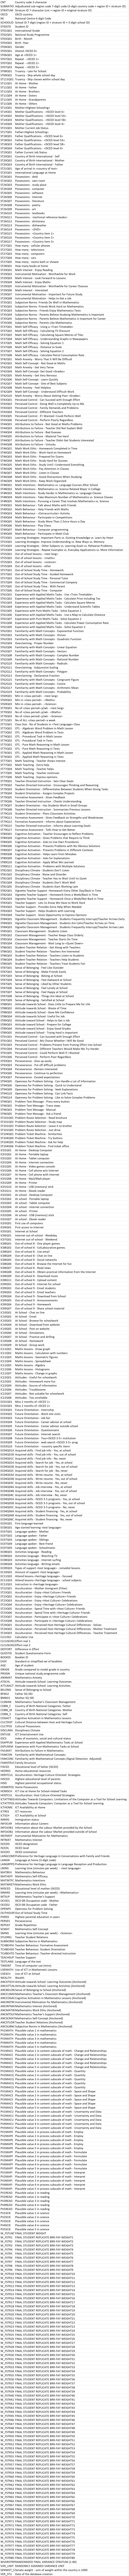

<span style="color:#6b705c"><font size="4">**What is/are the main feature(s) of interest in your dataset?**</span></font>

> <span style="color:#a5a58d"><font size="2">the main feature of interst is the students grades and their feelig or belonging to school</span></font>

<span style="color:#6b705c"><font size="4">**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**</span></font>

>
> <span style="color:#a5a58d"><font size="2">1- Birth Year</span></font>
>
> <span style="color:#a5a58d"><font size="2">2- 'Gender'</span></font>
>
> <span style="color:#a5a58d"><font size="2">3- 'Mother Job Status' and 'Father Job Status'</span></font>
>
> <span style="color:#a5a58d"><font size="2">4- 'Highest_EDU' for parents</span></font>
>
> <span style="color:#a5a58d"><font size="2">5- method of studying 'Study_time5':(with parents) ,'Study_time6':(using computer)</span></font>
>
> <span style="color:#a5a58d"><font size="2">6-'Internet on weekdays','Internet on weekend'</span></font>
>
> <span style="color:#a5a58d"><font size="2">7- 'Calculator' that used during the exam</span></font>
>
> <span style="color:#a5a58d"><font size="2">8- 'Language Of The Test'</span></font>

In [6]:
df_c = pd.DataFrame()

In [7]:
df_c['Student_ID'] = df['STIDSTD'].map(str)
df_c['Country'] = df['CNT']
df_c['Birth_Year'] = df['ST03Q02']
df_c['Gender'] = df['ST04Q01']
df_c['Mother_JS'] = df ['ST15Q01']#1
df_c['Father_JS'] = df['ST19Q01']#1
df_c['Highest_EDU'] = df['HISCED']
df_c['Study_time5'] = df['ST57Q05']#2
df_c['Study_time6'] = df['ST57Q06']#2 those columns will be merged
df_c['Outsider'] = df['ST87Q01']#4
df_c['Happy'] = df['ST87Q07']#4
df_c['Satisfied'] = df['ST87Q09']#4
df_c['Internet1'] = df['IC06Q01']#5
df_c['Internet2'] = df['IC07Q01']#5
df_c['Calculator'] = df['CLCUSE1']
df_c['Lan_Of_Test'] = df['TESTLANG']
df_c['Grade'] = df['GRADE']

In [203]:
df_clean = df_c.copy()

In [204]:
df_c['Birth_Year'].value_counts()

1996    451476
1997     34014
Name: Birth_Year, dtype: int64

## Univariate Exploration


<span style="color:#7C4E66"><font size="3">**1.what is the birth year for the majority of the sample?**</span></font>

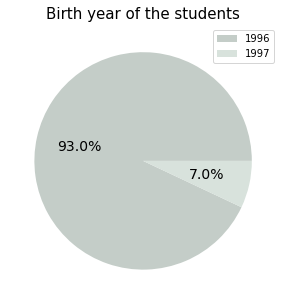

In [205]:
colors = ['#c4cdc8','#d8e2dc']
labels = ['1996','1997']

plt.figure(figsize=(5, 5))
plt.pie(df_clean['Birth_Year'].value_counts(),colors=colors,autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Birth year of the students',size=15)
plt.legend( labels  = labels, loc='best')
plt.show()

<span style="color:#CEB7B8"><font size="2">**as it shows, the majority of the sample is born in 1996.**</span></font>

<span style="color:#7C4E66"><font size="3">**2.what is the gender for the majority of the sample?**</span></font>

In [206]:
df_clean['Gender'].value_counts()

Female    245064
Male      240426
Name: Gender, dtype: int64

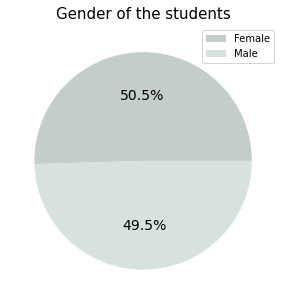

In [207]:
colors = ['#c4cdc8','#d8e2dc']
labels = ['Female','Male']

plt.figure(figsize=(5, 5))
plt.pie(df_clean['Gender'].value_counts(),colors=colors,autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Gender of the students',size=15)
plt.legend( labels  = labels, loc='best')
plt.show()

<span style="color:#CEB7B8"><font size="2">**they are almost the same.**</span></font>

<span style="color:#7C4E66"><font size="3">**3.what is the Mother and Father job status for the majority of the sample?**</span></font>

In [208]:
df_clean

Student_ID  Country  Birth_Year  Gender  \
0               1  Albania        1996  Female   
1               2  Albania        1996  Female   
2               3  Albania        1996  Female   
3               4  Albania        1996  Female   
4               5  Albania        1996  Female   
...           ...      ...         ...     ...   
485485       4955  Vietnam        1996  Female   
485486       4956  Vietnam        1996    Male   
485487       4957  Vietnam        1996    Male   
485488       4958  Vietnam        1996    Male   
485489       4959  Vietnam        1996  Female   

                                 Mother_JS  \
0       Other (e.g. home duties, retired)    
1             Working full-time <for pay>    
2             Working full-time <for pay>    
3             Working full-time <for pay>    
4              Working part-time <for pay>   
...                                    ...   
485485  Other (e.g. home duties, retired)    
485486  Other (e.g. home duties, retired)    
485487        Working full-time <for pay>    
485488  Other (e.g. home duties, retired)    
485489  Other (e.g. home duties, retired)    

                                 Father_JS        Highest_EDU  Study_time5  \
0              Working part-time <for pay>  ISCED 3A, ISCED 4          NaN   
1             Working full-time <for pay>         ISCED 5A, 6          0.0   
2             Working full-time <for pay>         ISCED 5A, 6          2.0   
3             Working full-time <for pay>         ISCED 5A, 6          0.0   
4              Working part-time <for pay>  ISCED 3A, ISCED 4          NaN   
...                                    ...                ...          ...   
485485  Other (e.g. home duties, retired)             ISCED 2          0.0   
485486  Other (e.g. home duties, retired)             ISCED 2          NaN   
485487        Working full-time <for pay>             ISCED 2          NaN   
485488  Other (e.g. home duties, retired)         ISCED 5A, 6          0.0   
485489        Working full-time <for pay>   ISCED 3A, ISCED 4          0.0   

        Study_time6           Outsider           Happy       Satisfied  \
0               NaN              Agree           Agree           Agree   
1               2.0                NaN             NaN             NaN   
2               3.0                NaN             NaN             NaN   
3               3.0                NaN             NaN             NaN   
4               NaN  Strongly disagree  Strongly agree  Strongly agree   
...             ...                ...             ...             ...   
485485          3.0                NaN             NaN             NaN   
485486          NaN           Disagree        Disagree        Disagree   
485487          NaN  Strongly disagree           Agree           Agree   
485488          5.0  Strongly disagree           Agree           Agree   
485489          0.0                NaN             NaN             NaN   

        Internet1  Internet2               Calculator  Lan_Of_Test  Grade  
0              99         99      A Simple calculator    Albanian     0.0  
1              99         99      A Simple calculator    Albanian     0.0  
2              99         99      A Simple calculator    Albanian    -1.0  
3              99         99                      NaN    Albanian    -1.0  
4              99         99                      NaN    Albanian    -1.0  
...           ...        ...                      ...          ...    ...  
485485         97         97      A Simple calculator  Vietnamese     0.0  
485486         97         97  A Scientific calculator  Vietnamese     0.0  
485487         97         97  A Scientific calculator  Vietnamese     0.0  
485488         97         97  A Scientific calculator  Vietnamese     0.0  
485489         97         97  A Scientific calculator  Vietnamese     0.0  

[485490 rows x 17 columns]

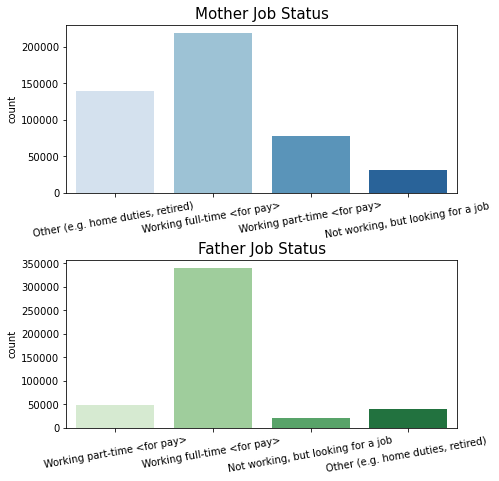

In [209]:
plt.figure(figsize = [7, 7])

plt.subplot(2, 1, 1)
sb.countplot(data = df_clean['Mother_JS'].value_counts(), x =df_clean['Mother_JS'], palette = 'Blues')
plt.title('Mother Job Status',size=15)
plt.xticks(rotation=10)
plt.xlabel('')
plt.subplot(2, 1, 2)
sb.countplot(data = df_clean['Father_JS'].value_counts(), x =df_clean['Father_JS'], palette = 'Greens')
plt.title('Father Job Status',size=15)
plt.xticks(rotation=10)
plt.xlabel('')
plt.subplots_adjust(bottom=0.1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

<span style="color:#CEB7B8"><font size="2">**the majority of the sample their fathers and mothers are working for a full time job.**</span></font>

<span style="color:#7C4E66"><font size="3">**6.what do the majority prefer between studying using computer and studying with parents?**</span></font>

<span style="color:#CEB7B8"><font size="2">**A. after notecing in the chart, Answers are starting from 0 to 30, I will convert the values to be out of 10**</span></font>

In [210]:
df_clean['Study_time5'].max()

30.0

In [211]:
df_clean['Study_With_Parents'] = (df_clean['Study_time5']/df_clean['Study_time5'].max())*10
df_clean['Study_using_Comp'] = (df_clean['Study_time6']/df_clean['Study_time6'].max())*10

<span style="color:#BC6C25"><font size="3">**Test**</span></font>

In [212]:
df_clean['Study_With_Parents'].max()

10.0

In [213]:
df_clean.drop(columns =['Study_time5','Study_time6'],axis=1, inplace=True)

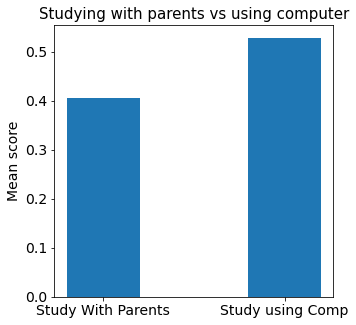

In [214]:
plt.figure(figsize=[5,5])
plt.xticks(size=14)
plt.yticks(size=14)
plt.bar(['Study With Parents','Study using Comp'], [df_clean['Study_With_Parents'].mean(),
                                                    df_clean['Study_using_Comp'].mean()],width = 0.4)
plt.ylabel('Mean score',size=14)
plt.title('Studying with parents vs using computer',size=15)
plt.show()

<span style="color:#CEB7B8"><font size="2">**precentage of students who prefer to study using computer is clearly higher.**</span></font>

<span style="color:#7C4E66"><font size="3">**7.where is the majority of the students from?**</span></font>

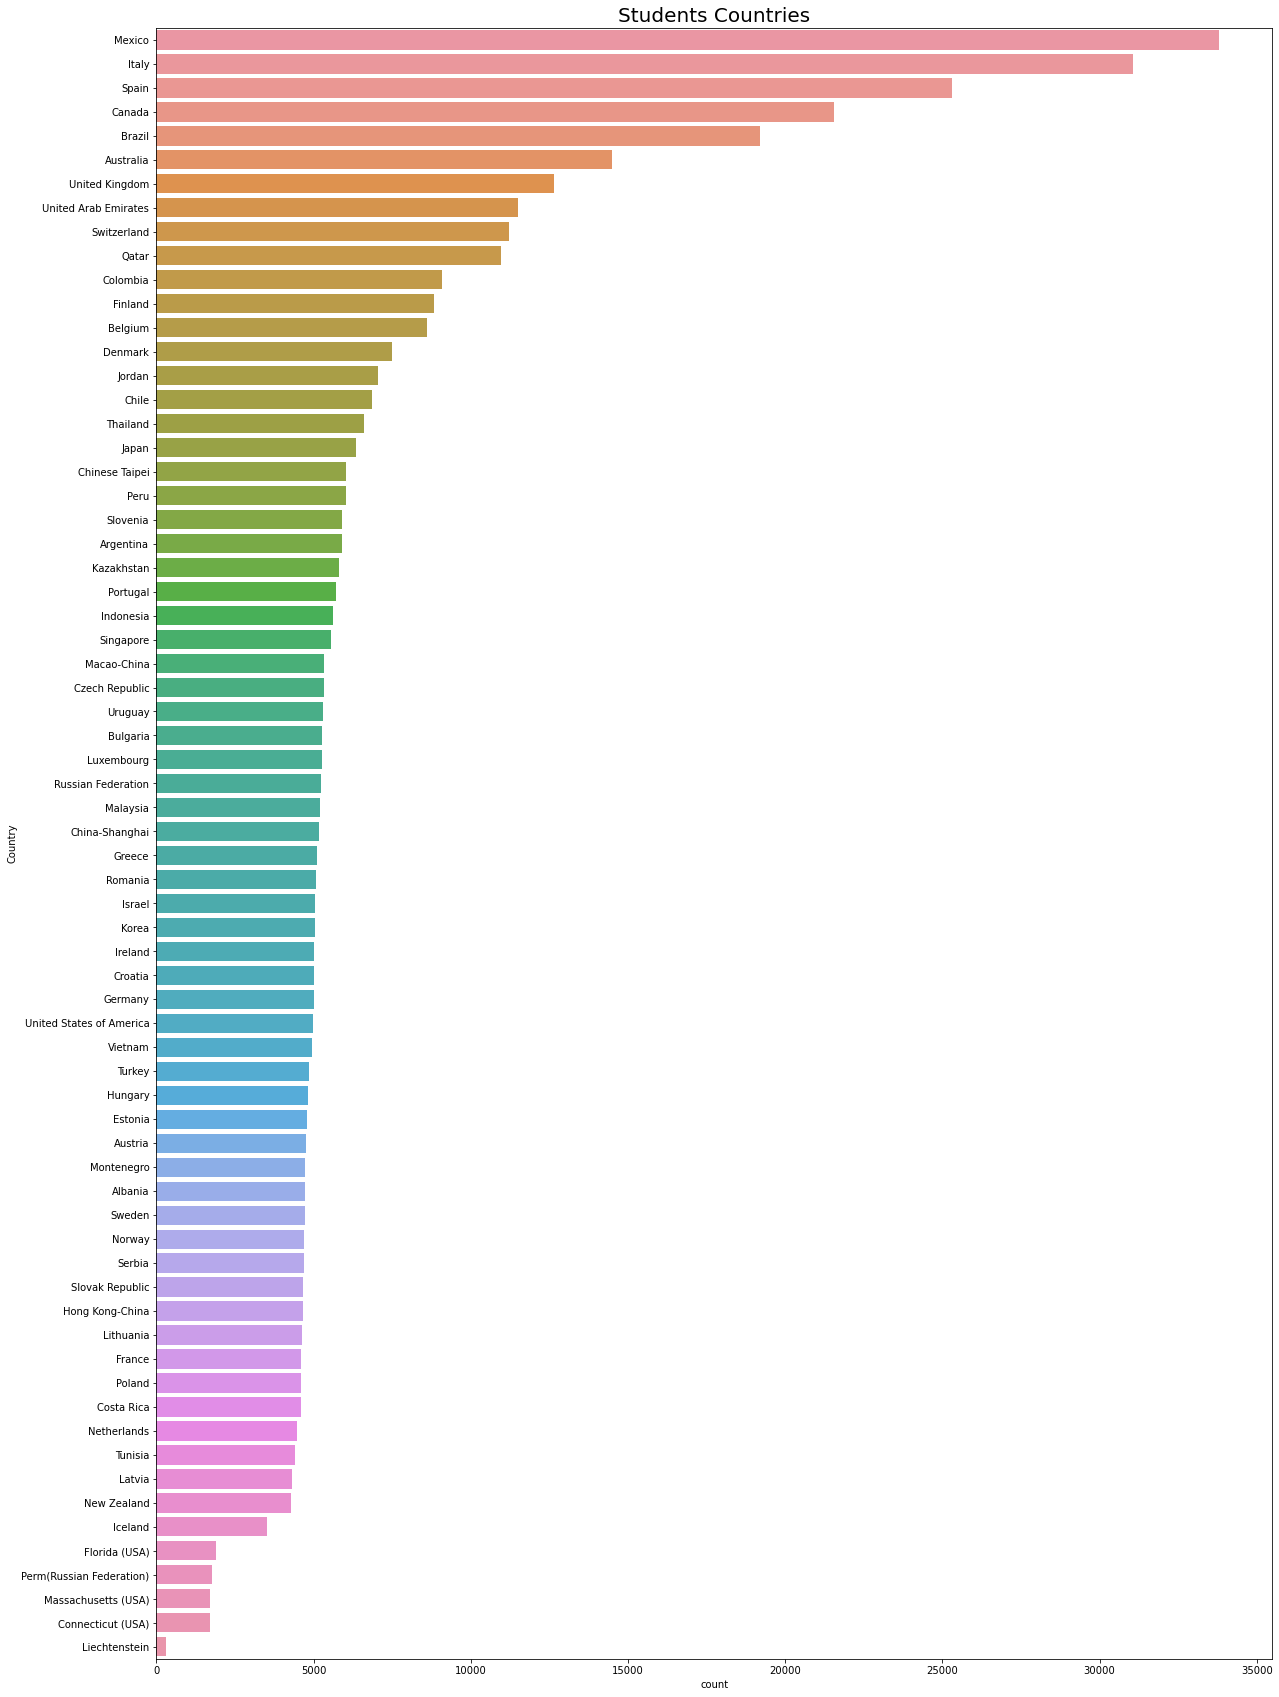

In [215]:
order= df_clean['Country'].value_counts().index

plt.figure(figsize=[20,30])
sb.countplot(data=df_clean,y='Country',order=order)
plt.title('Students Countries' ,size=20);

<span style="color:#CEB7B8"><font size="2">**As it shows, the majority is from Mexico.**</span></font>

<span style="color:#7C4E66"><font size="3">**8.what does the majority of the sample feels at school?**</span></font>

<span style="color:#CEB7B8"><font size="2">**A. devide the inswers into 2 sections (agree, disagree)to make the graph more clear.**</span></font>

In [216]:
for column in df_clean.loc[:, 'Outsider':'Satisfied']:
    def Belong(df_clean):
        if (('Disagree' in df_clean[column].__str__()) or 
            ('Strongly disagree' in df_clean[column].__str__())):
            return 'Disgree'
        else: return 'Agree'
    df_clean[column] = df_clean.apply(Belong, axis = 1)  

<span style="color:#BC6C25"><font size="3">**Test**</span></font>

In [217]:
df_clean['Outsider'].value_counts()


Disgree    270022
Agree      215468
Name: Outsider, dtype: int64

In [218]:
subplot1 = pd.DataFrame(df_clean['Satisfied'].value_counts())
subplot2 = pd.DataFrame(df_clean['Happy'].value_counts())
subplot3 = pd.DataFrame(df_clean['Outsider'].value_counts())

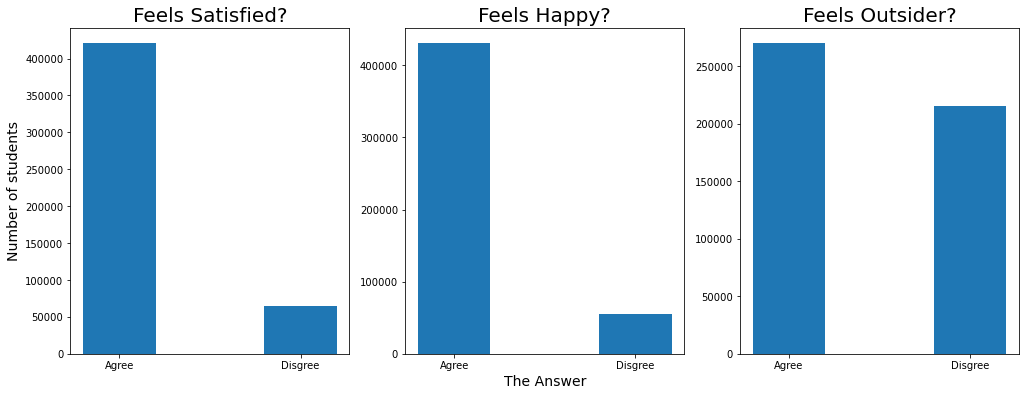

In [219]:
plt.figure(figsize = [17, 6])
plt.xticks(size=14)
plt.yticks(size=14)
plt.subplot(1, 3, 1)
plt.bar(subplot1.index, subplot1['Satisfied'],width = 0.4)
plt.title('Feels Satisfied?',size=20)
plt.ylabel('Number of students',size=14)
plt.subplot(1, 3, 2)
plt.bar(subplot1.index, subplot2['Happy'],width = 0.4)
plt.title('Feels Happy?',size=20)
plt.xlabel('The Answer',size=14)
plt.subplot(1, 3, 3)
plt.bar(subplot1.index, subplot3['Outsider'],width = 0.4)
plt.title('Feels Outsider?',size=20)

plt.show()

<span style="color:#CEB7B8"><font size="2">**the largest portion of the students feels happy or satisfied, even though the portion of students who feels like an outsider is not that small.**</span></font>

<span style="color:#7C4E66"><font size="3">**11.when does the majority of the sample use the internet?**</span></font>

<span style="color:#CEB7B8"><font size="2">**a. After notecing, there is a few values exceeding 10, we believe those values are wrong**</span></font>

In [220]:
#Internet1 = student prefer to use Internet during weekdays
#Internet2 = student prefer to use Internet during weekends
df_clean['Internet1'].max()

99

<span style="color:#CEB7B8"><font size="2">**b. we will convert them to be out of 10**</span></font>

In [221]:
df_clean.loc[df_clean['Internet1']>10,'Internet1'] = df_clean['Internet1']/10
df_clean.loc[df_clean['Internet2']>10,'Internet2'] = df_clean['Internet2']/10

C:\Users\Bushra\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Bushra\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


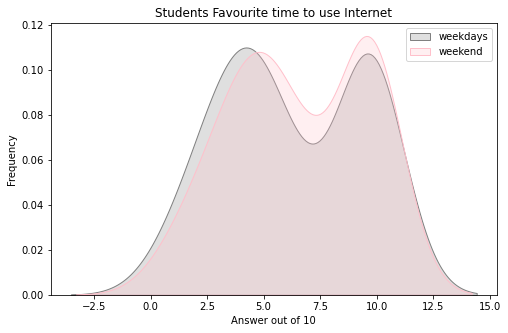

In [222]:
fig, ax = plt.subplots(figsize=(8,5))

sb.kdeplot(data=df_clean['Internet1'], shade=True, color='grey', bw=0.5, label='weekdays')
sb.kdeplot(data=df_clean['Internet2'], shade=True, color='pink', bw=0.5, label='weekend')
plt.title('Students Favourite time to use Internet')
plt.xlabel('Answer out of 10')
plt.ylabel('Frequency')
plt.legend( loc='best');

<span style="color:#CEB7B8"><font size="2">**Students are slightly more into using the Internet during the weekend.**</span></font>

<span style="color:#7C4E66"><font size="3">**13.what type of calculator does the majority of the sample use during exams?**</span></font>

In [223]:
graph14=df_clean[df_clean['Calculator'].notnull()]

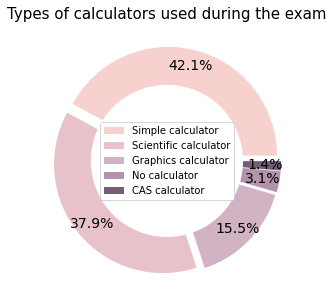

In [224]:
colors = ['#f7d1cd','#e8c2ca','#d1b3c4','#b392ac','#735d78']
labels = ['Simple calculator','Scientific calculator',
         'Graphics calculator','No calculator','CAS calculator']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.figure(figsize=(5, 5))
plt.pie(graph14['Calculator'].value_counts(),colors=colors,autopct='%1.1f%%',
        textprops={'fontsize': 14}, pctdistance=0.85,explode=explode)
plt.title('Types of calculators used during the exam',size=15)
plt.legend( labels  = labels, loc='center')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

<span style="color:#CEB7B8"><font size="2">**The most common calcularor is the simple one, then the scintific cacukator.**</span></font>

<span style="color:#7C4E66"><font size="3">**14.what is the distribution of students grades?**</span></font>

<span style="color:#CEB7B8"><font size="2">**a. as it shows the values start from -3**</span></font>

In [225]:
df_clean['Grade'].value_counts()

 0.0    348298
-1.0     76159
 1.0     39179
-2.0     15528
-3.0      4370
 2.0      1078
 3.0         5
Name: Grade, dtype: int64

<span style="color:#CEB7B8"><font size="2">**b. adjust values**</span></font>

In [226]:
df_clean['Grade'] = df_clean['Grade']+4

<span style="color:#BC6C25"><font size="3">**Test**</span></font>

In [227]:
df_clean['Grade'].value_counts()

4.0    348298
3.0     76159
5.0     39179
2.0     15528
1.0      4370
6.0      1078
7.0         5
Name: Grade, dtype: int64

Text(0.5, 1.0, 'Grades disterbution')

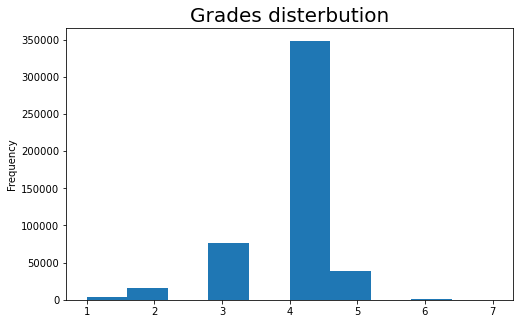

In [228]:
fig, ax = plt.subplots(figsize=(8,5))
df_clean['Grade'].plot(kind='hist')
plt.title('Grades disterbution',size=20)

<span style="color:#CEB7B8"><font size="2">**The most scors are between 4 and 5.**</span></font>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- a few answers in the (Preferred time to use the Interne [weekdays and weeken]' were higher than 10, we transform those values by dividing them by 10.
- Students grades range was not make sense, as it starts from -3, we transform the whole column by adding 3.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- we have adjust some names to have the reader's full understatment. for example: Parents' highest education.
- since there are multiple answers of certin quistions, we have summarize them or put the into groups that represent them well. for example: Parents job status, favourite studying method

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<span style="color:#7C4E66"><font size="3">**- is there any relationship between the job status of the mother and the father?**</span></font>

<span style="color:#CEB7B8"><font size="2">**A. devide them into working and not working groups to be able to creat Parents job status**</span></font>

In [229]:
df_clean.loc[df_clean['Mother_JS'].isnull(),'Mother_JS']='None'
df_clean.loc[df_clean['Father_JS'].isnull(),'Father_JS']='None'

In [230]:
def MJS(df_clean):
    if  (df_clean['Mother_JS']=='None'):
        return 'None' 
    
    elif ((df_clean['Mother_JS'] == 'Working full-time <for pay>')|
        (df_clean['Mother_JS'] == 'Working part-time <for pay>')):
        return 'Working'   
    
    else: return 'Not Working' 
        
df_clean['Mother_JS2'] = df_clean.apply(MJS, axis = 1)

In [231]:
def FJS(df_clean):
    if  (df_clean['Father_JS']=='None'):
        return 'None' 
    
    elif ((df_clean['Father_JS'] == 'Working full-time <for pay>')|
        (df_clean['Father_JS'] == 'Working part-time <for pay>')):
        return 'Working'
    
    else: return 'Not Working' 
        
df_clean['Father_JS2'] = df_clean.apply(FJS, axis = 1)

In [232]:
df_graph = pd.DataFrame()
df_graph['Father_JS'] = df_clean.groupby(['Mother_JS2'])['Father_JS2'].value_counts()
df_graph.head()

Father_JS
Mother_JS2  Father_JS2            
None        None              9464
            Not Working       7153
            Working           1122
Not Working Not Working     334692
            Working          34106

<span style="color:#CEB7B8"><font size="2">**B. creat Parents job statuss**</span></font>

In [233]:
def PJS(df_clean):
    if ((df_clean['Father_JS2'] == 'None')|
        (df_clean['Mother_JS2'] == 'None')):
        return 'None'
    
    elif ((df_clean['Father_JS2'] == 'Working')&
        (df_clean['Mother_JS2'] == 'Working')):
        return 'Both are working'
    
    elif ((df_clean['Father_JS2'] != 'Working')&
          (df_clean['Mother_JS2'] != 'Working')):
        return 'None of them is working'
    
    else: return 'One of them is working' 
        
df_clean['Parents_JS'] = df_clean.apply(PJS, axis = 1)       

In [234]:
g1 = df_clean[df_clean['Parents_JS']!='None']
g2 = pd.DataFrame(g1.groupby(['Mother_JS2'])['Father_JS2'].value_counts())


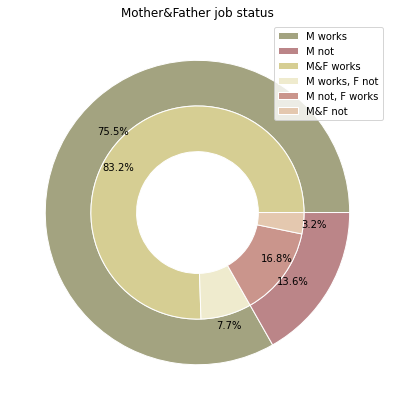

In [235]:
labels = ['M works','M not','M&F works','M works, F not','M not, F works','M&F not']
fig, ax = plt.subplots(figsize=(7,7))

size = 0.3

outer_colors = ['#a3a380','#bb8588']
inner_colors = ['#d6ce93','#efebce','#ca958c','#e4c8af']

ax.pie(g1['Mother_JS2'].value_counts(), radius=1, colors=outer_colors,
       autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(g2['Father_JS2'], radius=1-size, colors=inner_colors,
       autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), labeldistance=1.2 ,pctdistance=1.1)

ax.set(aspect="equal", title='Mother&Father job status')
plt.legend(labels = labels, loc='best')
plt.show()

<span style="color:#CEB7B8"><font size="2">**the highest portion is the students whose their mother and father are working, then whose Father just is working, then whose Mother just is working,and the least portion is the students whose their parents are not working. I believethis is leading us to indirect relationship between the Mother and father job stasuses.**</span></font>

<span style="color:#7C4E66"><font size="3">**8.is the student more into studying with parents when their education qualifcations are higher?**</span></font>

In [236]:
df_clean['S_with_Parents'] = df_clean['Study_With_Parents']
df_clean['S_using_comp'] = df_clean['Study_using_Comp']

for column in df_clean.loc[:, 'Study_With_Parents':'Study_using_Comp']:
    def swp(df_clean):
        if (df_clean[column] == None):
            return None
        elif (df_clean[column]>=5):
            return True
        else: return False
    df_clean[column] = df_clean.apply(swp, axis = 1)

<span style="color:#CEB7B8"><font size="2">**B. redefine education qualificatons, Sourcs:**</span></font>
[Wikipedia](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education#:~:text=Level%205A%3A%20First%20stage%20of,professions%20with%20higher%20skills%20requirements.&text=Level%206%3A%20Second%20stage%20of,to%20an%20advanced%20research%20qualification)


In [237]:
df_clean.loc[df_clean['Highest_EDU']=='ISCED 5A, 6','Highest_EDU'] = 'Bachelors or equivalent'
df_clean.loc[(df_clean['Highest_EDU']=='ISCED 3A, ISCED 4')|
             (df_clean['Highest_EDU']=='ISCED 3B, C'),'Highest_EDU'] = 'Post-secondary non-tertiary education'
df_clean.loc[df_clean['Highest_EDU']=='ISCED 5B','Highest_EDU'] = 'Short-cycle tertiary education'
df_clean.loc[df_clean['Highest_EDU']=='ISCED 2','Highest_EDU'] = 'Lower secondary education'
df_clean.loc[df_clean['Highest_EDU']=='ISCED 3B, C','Highest_EDU'] = 'Lower secondary education'
df_clean.loc[df_clean['Highest_EDU']=='ISCED 1','Highest_EDU'] = 'Primary education'

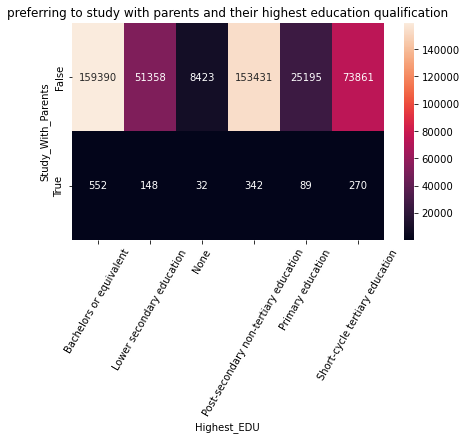

In [238]:
def heatm():
    fig, ax = plt.subplots(figsize=(7,4))
    conti=pd.crosstab(df_clean['Study_With_Parents'],df_clean['Highest_EDU'])
    sb.heatmap(conti,annot = True, fmt = 'd',)
    plt.title('preferring to study with parents and their highest education qualification')
    plt.xticks(rotation=60);

heatm()

<span style="color:#CEB7B8"><font size="2">**the highest value within the students who were into studying with their parents was for Bachelors as highest education qualifcation.. but when we took deeper look, also the highest value within students who were not into studying with their parents was for the same highest education qualification. so if we took those values as precentages they will be similar. there is no relationship between these two variables.**</span></font>

<span style="color:#7C4E66"><font size="3">**9.is there any relationship between students gender and their belonging to the school?**</span></font>

In [239]:
subplot4 = pd.DataFrame(df_clean.groupby(['Gender'])['Satisfied'].value_counts())
subplot5 = pd.DataFrame(df_clean.groupby(['Gender'])['Happy'].value_counts())
subplot6 = pd.DataFrame(df_clean.groupby(['Gender'])['Outsider'].value_counts())

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

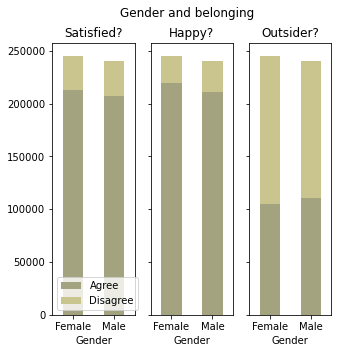

In [240]:
labels = ['Agree','Disagree']
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=1,ncols=3,sharex=True)
fig.suptitle('Gender and belonging')

subplot4.unstack().plot(ax=ax1,kind='bar', stacked=True, title='Satisfied?',
                        color=['#a3a380','#cac48f'],figsize = [5, 5],)
ax1.legend(loc='lower left', labels  = labels,fontsize=10)
ax1.tick_params(rotation=0)

subplot5.unstack().plot(ax=ax2,kind='bar', stacked=True, title='Happy?',
        color=['#a3a380','#cac48f'],figsize = [5, 5],legend=False)
ax2.set_yticklabels([])
ax2.tick_params(rotation=0)

subplot6.unstack().plot(ax=ax3,kind='bar', stacked=True, title='Outsider?',
        color=['#a3a380','#cac48f'],figsize = [5, 5],legend=False)
ax3.set_yticklabels([])
plt.xticks(rotation=0)

<span style="color:#CEB7B8"><font size="2">**the graphs shows that females students are slighly feels more satisfied and happy, and feels less like an outsider.. but overall there is no significant difference**</span></font>

<span style="color:#7C4E66"><font size="3">**10.do the parents existence at home would affect the student feeling towards school?**</span></font>

In [241]:
subplot7 = pd.DataFrame(g1.groupby(['Parents_JS'])['Satisfied'].value_counts())
subplot8 = pd.DataFrame(g1.groupby(['Parents_JS'])['Happy'].value_counts())
subplot9 = pd.DataFrame(g1.groupby(['Parents_JS'])['Outsider'].value_counts())

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

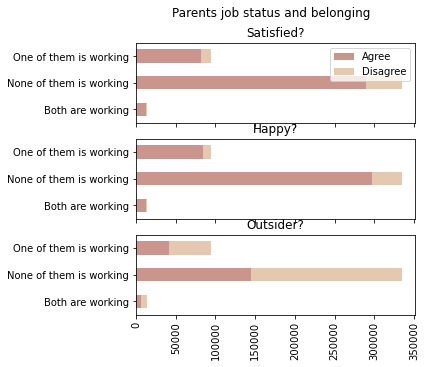

In [242]:
labels = ['Agree','Disagree']
colors = ['#ca958c','#e4c8af']
fig,((ax1,ax2,ax3)) = plt.subplots(nrows=3,ncols=1,sharex=True)
fig.suptitle('Parents job status and belonging')

subplot7.unstack().plot(ax=ax1,kind='barh', stacked=True, title='Satisfied?',
                        color=colors,figsize = [5, 5])
ax1.legend(loc='upper right', labels  = labels,fontsize=10)
ax1.set_ylabel('')

subplot8.unstack().plot(ax=ax2,kind='barh', stacked=True, title='Happy?',
        color=colors,figsize = [5, 5],legend=False)
ax2.set_ylabel('')

subplot9.unstack().plot(ax=ax3,kind='barh', stacked=True, title='Outsider?',
        color=colors,figsize = [5, 5],legend=False)
ax3.set_ylabel('')
plt.xticks(rotation=90)


<span style="color:#CEB7B8"><font size="2">**it is clear that parents job status has no effect on the students' belonging to school.**</span></font>

<span style="color:#7C4E66"><font size="3">**12.would using computer to study affects the student favourite time to use the Internet?**</span></font>

In [243]:
#Internet1 = student prefer to use Internet during weekdays
#Internet2 = student prefer to use Internet during weekends

graph12 = df_clean.groupby(pd.cut(df_clean['S_with_Parents'],
                      bins=[0,3,7,10]))['Internet1','Internet2'].mean()
graph13 = df_clean.groupby(pd.cut(df_clean['S_using_comp'],
                      bins=[0,3,7,10]))['Internet1','Internet2'].mean()
graph12

C:\Users\Bushra\AppData\Local\Temp/ipykernel_17232/1385488565.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph12 = df_clean.groupby(pd.cut(df_clean['S_with_Parents'],
C:\Users\Bushra\AppData\Local\Temp/ipykernel_17232/1385488565.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph13 = df_clean.groupby(pd.cut(df_clean['S_using_comp'],


Internet1  Internet2
S_with_Parents                      
(0, 3]           6.446665   6.663687
(3, 7]           6.678650   6.861625
(7, 10]          6.977622   7.071678

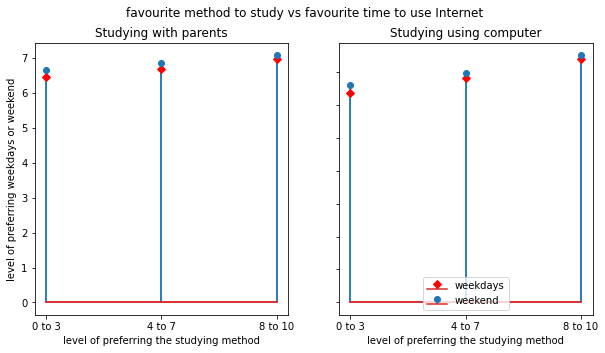

In [244]:
L = ['0 to 3','4 to 7','8 to 10']

fig,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,sharex=True,figsize = [10, 5])
fig.suptitle('favourite method to study vs favourite time to use Internet')
ax1.stem( L , graph12['Internet1'],markerfmt = 'Dr',label='weekdays')
ax1.stem( L , graph12['Internet2'],label='weekend')
ax1.title.set_text('Studying with parents')
ax1.set_xlabel('level of preferring the studying method')
ax1.set_ylabel('level of preferring weekdays or weekend')

ax2.stem( L , graph13['Internet1'],markerfmt = 'Dr')
ax2.stem( L , graph13['Internet2'])
ax2.set_yticklabels([])
ax2.title.set_text('Studying using computer')
ax2.set_xlabel('level of preferring the studying method')
ax2.legend(['weekdays', 'weekend'],loc='lower center');

<span style="color:#CEB7B8"><font size="2">**surprisingly, students who prefer to study using computer have the lowest preference to use the Inrenet during weekdays and weekend!.**</span></font>



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> surprisingly, students who prefer to study using computer have the lowest preference to use the Inrenet during weekdays and weekend!.

## Multivariate Exploration


<span style="color:#7C4E66"><font size="3">**15.between these 4 what variable has the strongest effect on the students grades?**</span></font>

<span style="color:#ACAD94"><font size="3">**Gender - language of the test - Calculator type - Parents job status**</span></font>

C:\Users\Bushra\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Bushra\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Bushra\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Bushra\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is 

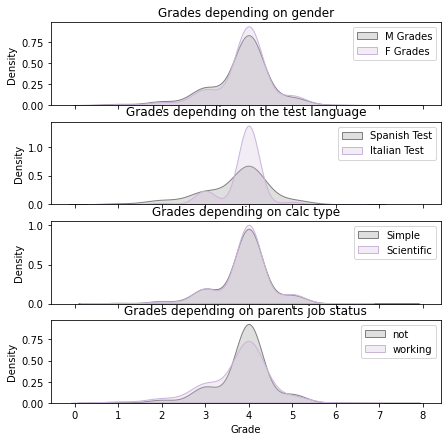

In [245]:
fig,((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=4,ncols=1,sharex=True,figsize = [7, 7])

sb.kdeplot(ax=ax1,data=df_clean[df_clean['Gender']=='Male']['Grade'], shade=True, color='grey', bw=0.5, label='M Grades')
sb.kdeplot(ax=ax1,data=df_clean[df_clean['Gender']=='Female']['Grade'], shade=True, color='#cdb4db', bw=0.5, label='F Grades')
ax1.title.set_text('Grades depending on gender')
ax1.legend(loc='upper right', labels  = ['M Grades','F Grades'],fontsize=10)


sb.kdeplot(ax=ax2,data=df_clean[df_clean['Lan_Of_Test']=='Spanish']['Grade'], shade=True, color='grey', bw=0.5, label='Spanish Test')
sb.kdeplot(ax=ax2,data=df_clean[df_clean['Lan_Of_Test']=='Italian']['Grade'], shade=True, color='#cdb4db', bw=0.5, label='Italian Test')
ax2.title.set_text('Grades depending on the test language')
ax2.legend(loc='upper right', labels  = ['Spanish Test','Italian Test'],fontsize=10)


sb.kdeplot(ax=ax3,data=df_clean[df_clean['Calculator']=='A Simple calculator']['Grade'], shade=True, color='grey', bw=0.5, label='1996')
sb.kdeplot(ax=ax3,data=df_clean[df_clean['Calculator']=='A Scientific calculator']['Grade'], shade=True, color='#cdb4db', bw=0.5, label='1997')
ax3.title.set_text('Grades depending on calc type')
ax3.legend(loc='upper right', labels  = ['Simple','Scientific'],fontsize=10)


sb.kdeplot(ax=ax4,data=df_clean[df_clean['Parents_JS']=='None of them is working']['Grade'], shade=True, color='grey', bw=0.5, label='1996')
sb.kdeplot(ax=ax4,data=df_clean[df_clean['Parents_JS']=='Both are working']['Grade'], shade=True, color='#cdb4db', bw=0.5, label='1997')
ax4.title.set_text('Grades depending on parents job status')
ax4.legend(loc='upper right', labels  = ['not','working'],fontsize=10)

<span style="color:#CEB7B8"><font size="2">**as it shows, test language has the strongest effect within those 4 variables, we notice that the distribution of Italian grades has higher peek but over all spanish grades is higher.**</span></font>

<span style="color:#7C4E66"><font size="3">**- what is the relation ship between the gender, test language , happiness in school and the grade?**</span></font>

In [246]:
#converting languages into numbers to graph them
sizes = pd.DataFrame(df_clean['S_with_Parents'].value_counts()).index
df_clean.loc[df_clean['Gender']== 'Female','bubble_color'] = '#cdb4db'
df_clean.loc[df_clean['Gender']== 'Male','bubble_color'] = '#023047'
lang = pd.DataFrame(df_clean['Lan_Of_Test'].value_counts())
lang['rank']=lang['Lan_Of_Test'].rank()
lang['Lan_Of_Test'] = lang.index

In [247]:
#adding the rank or the integer name to the main data frame
inner_join = pd.merge(df_clean, 
                      lang, 
                      on ='Lan_Of_Test', 
                      how ='inner')

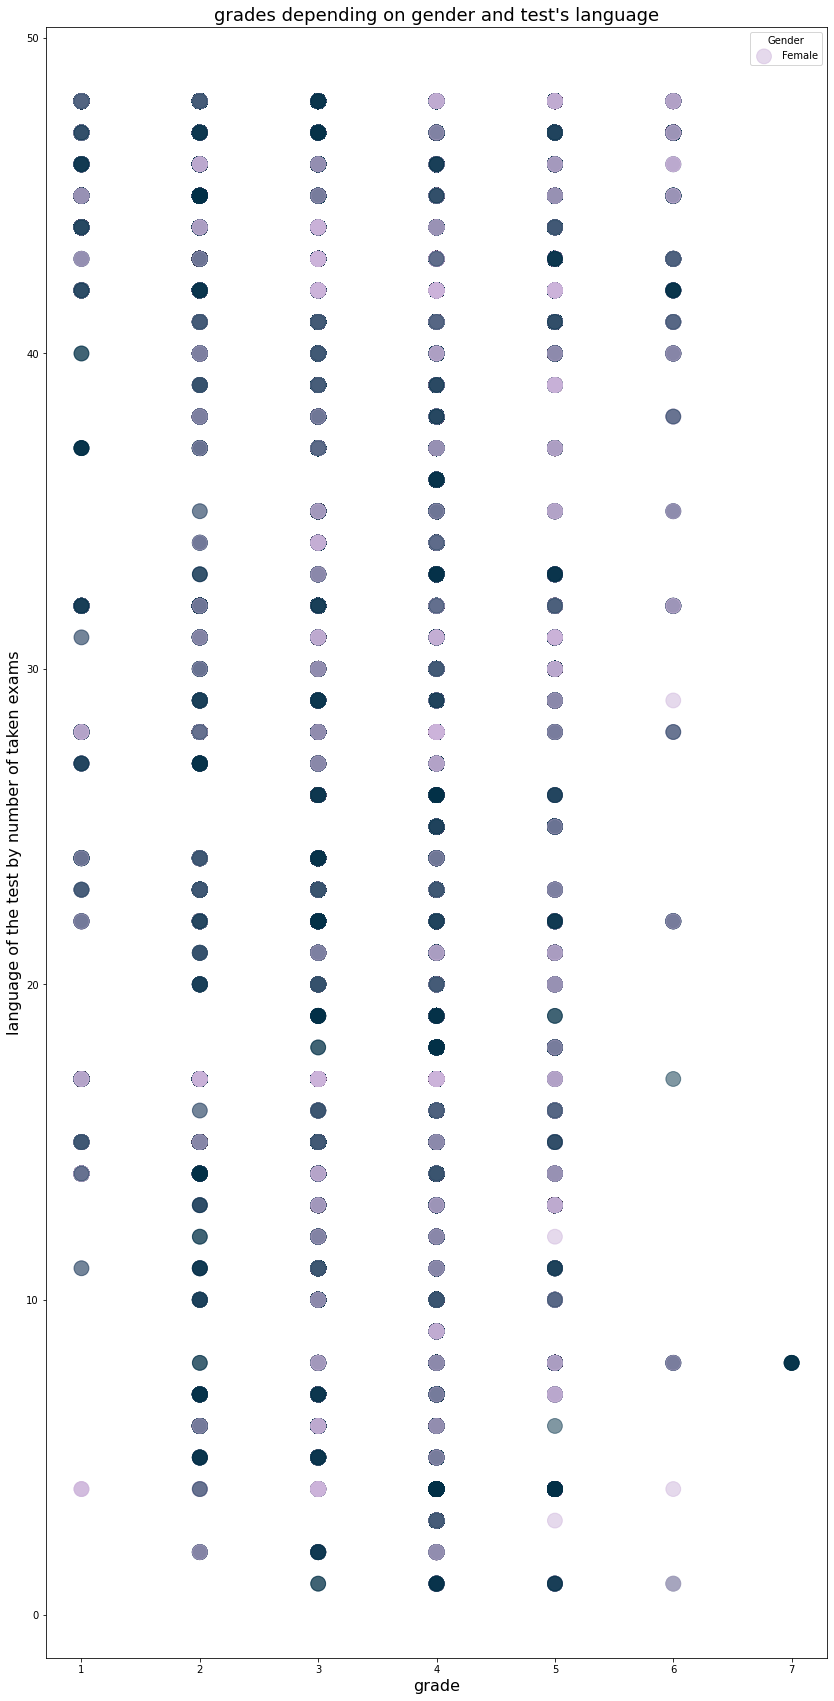

In [248]:
fig, ax = plt.subplots(figsize=(14, 30))

scatter = ax.scatter(x='Grade', y='rank',
             c = 'bubble_color',
             s = 220,
             alpha=0.5,
             data=inner_join)

plt.xlabel("grade", size=16)
plt.ylabel("language of the test by number of taken exams", size=16)
plt.title("grades depending on gender and test's language", size=18)

# produce a legend with the unique colors from the scatter
ax.legend(labels = ['Female','Male'],loc="upper right", title="Gender")
plt.show()


<span style="color:#CEB7B8"><font size="2">**as it shows, number of males who are getting grade = 1 is higher than males getting grade =7, as well as Females getting grade =7 is higher than Females getting grade =1**</span></font>

<span style="color:#7C4E66"><font size="3">**- what is the relationship between country, happiness,grade?**</span></font>


In [249]:
df_gr = df_c[df_c['Happy'].notnull()]
df_gr = df_gr[df_gr['Grade']>0]

In [250]:
df_gr.loc[df_gr['Happy']=='Strongly agree','Happy']=3
df_gr.loc[df_gr['Happy']=='Agree','Happy']=2
df_gr.loc[df_gr['Happy']=='Disagree','Happy']=1
df_gr.loc[df_gr['Happy']=='Strongly disagree','Happy']=0

In [251]:
H = pd.DataFrame(df_gr.groupby(['Country'])['Happy'].mean())
G = pd.DataFrame(df_gr.groupby(['Country'])['Grade'].mean())
H_C_G = pd.merge(H, G,on ='Country',how ='inner')

Text(0.5, 1.0, 'Grades and happieness within countruies')

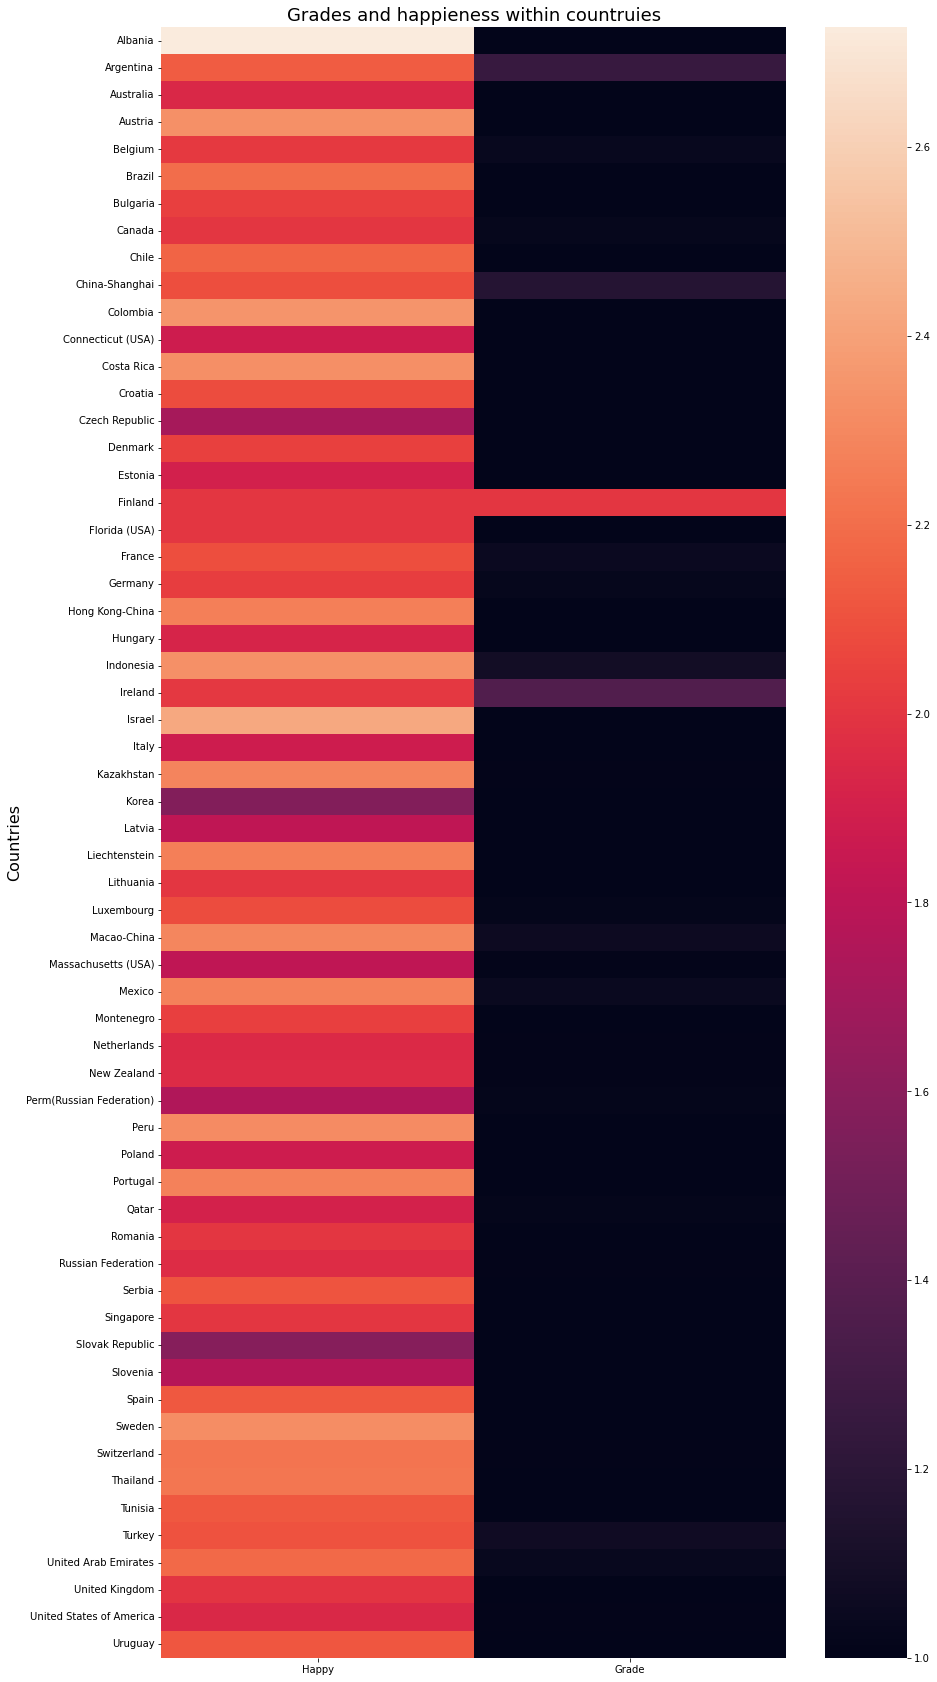

In [252]:
fig, ax = plt.subplots(figsize=(14, 30))
sb.heatmap(H_C_G)
plt.ylabel("Countries", size=16)
plt.title("Grades and happieness within countruies", size=18)

<span style="color:#CEB7B8"><font size="2">**as it shows, one of the happiest countries is Albania, and the country that has highst grade mean is Finland.. moreover we noticed that usually countries with lowest happiness rates do not have high scores**</span></font>

In [253]:
df_clean.to_csv(r'C:\Users\Bushra\Documents\udacity\project 5\PISA_cleaned.csv')

## Conclusions


<span style="color:#CEB7B8"><font size="2">**1- The majority of the sample is born in 1996. the portions of females and males are the same**</span></font>

<span style="color:#CEB7B8"><font size="2">**2- The generality of the sample their fathers and mothers are working for a full time job.**</span></font>

<span style="color:#CEB7B8"><font size="2">**3- Precentage of students who prefer to study using computer is clearly higher.**</span></font>

<span style="color:#CEB7B8"><font size="2">**4- The largest portion of students is from Mexico.**</span></font>

<span style="color:#CEB7B8"><font size="2">**5-The largest portion of the students feels happy or satisfied, even though the portion of students who feels like an outsider is not that small.**</span></font>

<span style="color:#CEB7B8"><font size="2">**6- The most common calcularor to use during the exam is the simple one, then the scintific cacukator.**</span></font>

<span style="color:#CEB7B8"><font size="2">**7- The most scors are between 4 and 5.**</span></font>

<span style="color:#CEB7B8"><font size="2">**8- The highest portion is the students with working mother & father, then students with working Father, then students with working Mother,and the least portion is the students whose both of their parents are not working.**</span></font>
><span style="color:#CEB7B8"><font size="2">**I believethis is leading us to indirect relationship between the Mother and father job stasuses.**</span></font>

<span style="color:#CEB7B8"><font size="2">**9- The highest value within the students who were into studying with parents, their highest education qualifcation was Bachelors.. but when we took deeper look, also the highest value within students who were not into studying with their parents was for the same highest education qualification. so if we took those values as precentages they will be similar.**</span></font>
><span style="color:#CEB7B8"><font size="2">**there is no relationship between these two variables.**</span></font>

<span style="color:#CEB7B8"><font size="2">**10- Females students are slighly feels more satisfied and happy, and feels less like an outsider, and it is clear that parents job status has no effect on the students' feeling toward school.**</span></font>

<span style="color:#CEB7B8"><font size="2">**11- surprisingly, students who prefer to study using computer have the lowest preference to use the Inrenet during weekdays and weekend!.**</span></font>

<span style="color:#CEB7B8"><font size="2">**12- Test language has the strongest effect within those 4 variables [Gender, Calculator type, Test language,parents job status], we notice that the distribution of Italian grades has higher peek but over all spanish grades is higher.**</span></font>

<span style="color:#CEB7B8"><font size="2">**13- one of the happiest countries is Albania, and the country that has highst grade mean is Finland.. moreover we noticed that usually countries with lowest happiness rates do not have high scores**</span></font>